# Demo of GEBCO gazetteer submarine features

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy
from cartopy import crs as ccrs
import xarray as xr

In [2]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m',
                                        edgecolor='k', facecolor='palegreen')
bbox = dict(boxstyle ="round", fc ="0.8") 

In [3]:
# Read n gazetteer points to a geopandas dataframe
places = gpd.read_file('features/features-point.shp')
places.tail()

,name,type,meeting,proposer,prop_year,discoverer,disc_year,history,comments,status,primary,geometry
3191,Alvares Cabral,Seachannel,SCUFN-13,"Jean-Rene Vanney, University of Paris IV, France",1999.0,None,NaN,Named after the Portuguese explorer Pedro Alva...,None,APPROVED,T,POINT (-7.75000 36.88333)
3192,Candarli,Basin,SCGN-8,"Sevket Gucluer, Department of Navigation, Hydr...",1986.0,None,NaN,"Named from the Turkish research vessel ""Candar...",This feature lies within the larger Candarli S...,APPROVED,T,POINT (26.78333 38.83333)
3193,Ile Rousse,Canyon,None,None,NaN,None,NaN,None,None,APPROVED,T,POINT (8.91667 42.80000)
3194,Ohena,Knoll,SCUFN-27,"Mark Dyer, New Zealand Geographic Board (NZGB)...",2014.0,None,1989.0,Named from the nearby Ohena Island and Little ...,This isolated conical feature is one in a grou...,APPROVED,F,POINT (176.94680 -36.42630)
3195,Otara,Knoll,SCUFN-25,New Zealand Geographic Board (NZGB),2012.0,None,NaN,"Named from the nearby Otara River, New Zealand...",This knoll is situated at the north-eastern en...,APPROVED,F,POINT (177.34980 -36.95000)


In [4]:
# Import the bathy. This is GEBCO subset to every 5th value to fit in a small github repo
ds = xr.open_dataset('bisc_small.nc')
bathy_lon = ds.lon
bathy_lat = ds.lat
bathy_h = ds.bathy

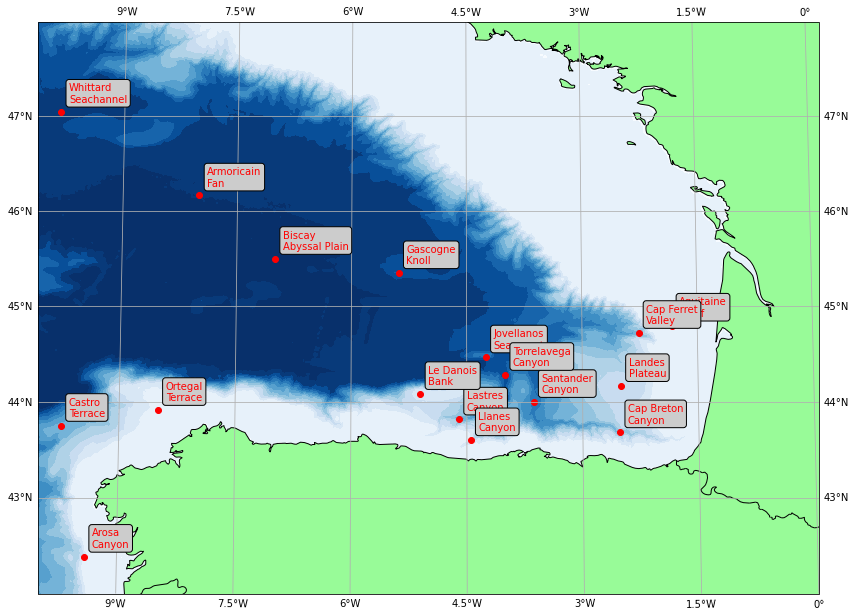

In [5]:
# subset gazetteer points to just the locations on the canvas
euro = places.cx[-10:0, 42:48]

# Create a canvas of the Bay of Biscay
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-5))
transform = ccrs.PlateCarree()._as_mpl_transform(ax)
ax.set_extent([-10, 0, 42, 48], crs=ccrs.PlateCarree());

# Cnotour on the bathymetry
ax.contourf(bathy_lon, bathy_lat, bathy_h, 20, vmin=-4800, vmax=200, cmap='Blues_r', transform=ccrs.PlateCarree())

# Add land and borders
ax.add_feature(land_10m)
ax.add_feature(cartopy.feature.BORDERS)

# Scatter the points of interest
ax.scatter(euro.geometry.x, euro.geometry.y, color='red', transform=ccrs.PlateCarree())

# Add annotations. Label is combo of locatation name and type (seamount, canyon etc.)
for x, y, label, typ in zip(euro.geometry.x, euro.geometry.y, euro.name, euro['type']):
    ax.annotate(label + '\n' + typ, xy=(x, y),  xytext=(x+0.1, y+0.1),
                xycoords=transform, color='red', fontsize=10,  bbox = bbox)
gl = ax.gridlines(draw_labels=True)


-----------------------
References

- Features from GEBCO consortium https://www.ngdc.noaa.gov/gazetteer/
- https://stackoverflow.com/questions/38899190/geopandas-label-polygons
- https://stackoverflow.com/questions/25416600/why-the-annotate-worked-unexpected-here-in-cartopy
